In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [18]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [19]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [20]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [21]:
from tqdm.notebook import tqdm

In [22]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode= "grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [23]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [24]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [25]:
x_train = train_features/255.0
x_test = test_features/255.0

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [28]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [29]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [30]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [49]:
early_stopping = EarlyStopping(patience=5, verbose=1)
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping]) 

Epoch 1/100
226/226 [==============================] - 756s 3s/step - loss: 1.8225 - accuracy: 0.2446 - val_loss: 1.8119 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 650s 3s/step - loss: 1.8143 - accuracy: 0.2486 - val_loss: 1.8013 - val_accuracy: 0.2583
Epoch 3/100
226/226 [==============================] - 594s 3s/step - loss: 1.7869 - accuracy: 0.2527 - val_loss: 1.7265 - val_accuracy: 0.2816
Epoch 4/100
226/226 [==============================] - 598s 3s/step - loss: 1.7142 - accuracy: 0.2937 - val_loss: 1.6280 - val_accuracy: 0.3551
Epoch 5/100
226/226 [==============================] - 599s 3s/step - loss: 1.6086 - accuracy: 0.3624 - val_loss: 1.5083 - val_accuracy: 0.4277
Epoch 6/100
226/226 [==============================] - 603s 3s/step - loss: 1.5087 - accuracy: 0.4150 - val_loss: 1.3631 - val_accuracy: 0.4730
Epoch 7/100
226/226 [==============================] - 618s 3s/step - loss: 1.4414 - accuracy: 0.4409 - val_loss: 1.3100 - val_accuracy:

In [1]:
model_json = model.to_json()
with open("Emotiondetection.json",'w') as json_file:
    json_file.write(model_json)
model.save("Emotiondetection.h5")

In [32]:
from keras.models import model_from_json

In [33]:
json_file = open("Emotiondetection.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("Emotiondetection.h5")

In [34]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [35]:
def ef(image):
    img = load_img(image,color_mode= "grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [25]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 20s 20s/step
model prediction is  sad


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 55ms/step
model prediction is  sad


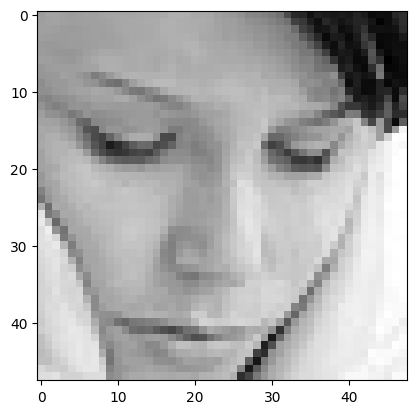

In [42]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 201ms/step
model prediction is  sad


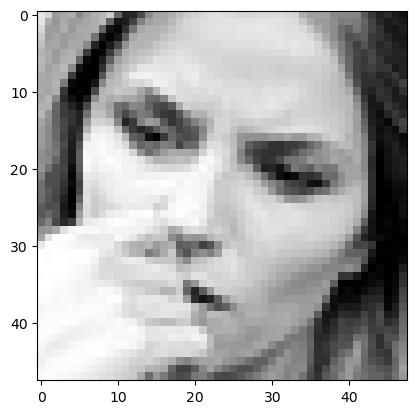

In [38]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 57ms/step
model prediction is  disgust


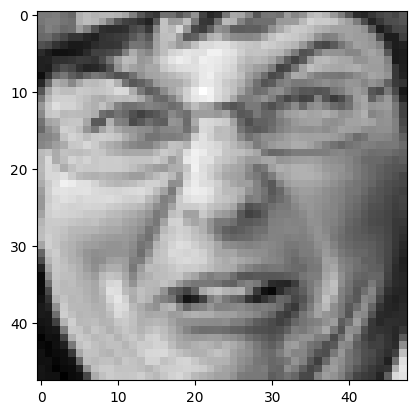

In [44]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


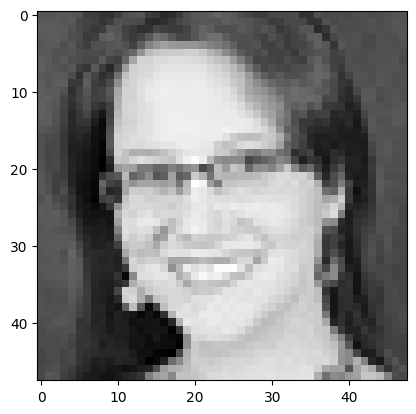

In [45]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


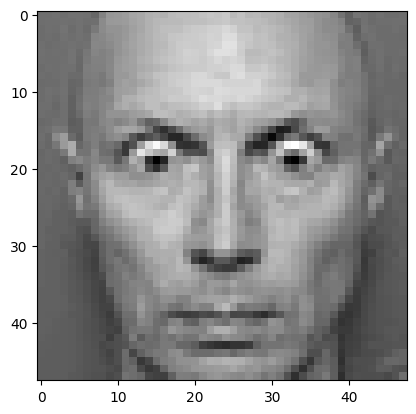

In [46]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

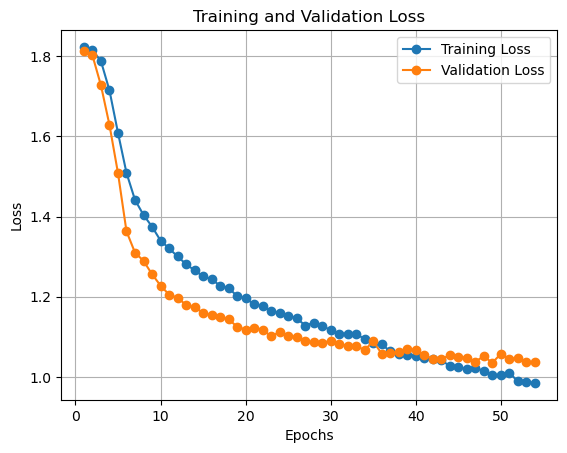

In [20]:
import matplotlib.pyplot as plt

# Replace these with your actual train_loss and val_loss values
train_loss =[1.8225,1.8143,1.7869,1.7142,1.6086,1.5087,1.4414,1.4039,1.3748,1.3402,1.3207,1.3005,1.2813,1.2659,1.2512,1.2434,1.2279,1.2220,1.2018,1.1965,1.1809,1.1776,1.1645,1.1595,1.1531,1.1469,1.1284,1.1350,1.1265,1.1178,1.1080,1.1084,1.1067,1.0953,1.0841,1.0819,1.0639,1.0573,1.0553,1.0528,1.0471,1.0449,1.0413,1.0282,1.0247,1.0203,1.0222,1.0157,1.0048,1.0060,1.0110,0.9890,0.9873,0.9854]  # List of training loss values
val_loss = [1.8119,1.8013,1.7265,1.6280,1.5083,1.3631,1.3100,1.2896,1.2563,1.2281,1.2054,1.1977,1.1797,1.1739,1.1603,1.1536,1.1498,1.1440,1.1255,1.1183,1.1231,1.1182,1.1013,1.1125,1.1026,1.0999,1.0887,1.0871,1.0855,1.0902,1.0823,1.0778,1.0767,1.0676,1.0890,1.0582,1.0599,1.0629,1.0700,1.0674,1.0545,1.0456,1.0454,1.0538,1.0496,1.0487,1.0386,1.0518,1.0355,1.0579,1.0457,1.0471,1.0384,1.0363]  # List of validation loss values

epochs = range(1, len(train_loss) + 1)

# Plotting
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()